In [1]:
import time
import sys
sys.path.append('../')

import ten
import ten.experiments as experiments
from ten.experiments.mechanisms import forster, boolean

## Creación de la NP

In [2]:
# Dopantes propios (intrisicos) de la NP
dopantes_propios = ten.Aceptor(number=10, r_mechanisms=1, way='vol')

# Dopantes que le vamos a agregar a la NP
dopantes = ten.Aceptor(number=5, r_mechanisms=3.14, way='vol')

# Nanoparticula
NP = ten.Nanoparticle(r_param=[15, 0], tau_d=0.333, mean_path=80, epsilon=1, intrinsic_aceptors=dopantes_propios)
print(NP)

Radio: 15 ~ U(15, 0),
Tau: 0.333, Mean_path: 80, Epsilon: 1,
Delta_t: 0.0041625, Prob decay: 0.012422199506118559,
Number Intrisic aceptors: 10, R_Mechanisms: 1, way: vol


## Eficiencia de Quenching

In [3]:
out = experiments.quenching(NP, dopantes, forster, 'laser')
print("Eficiencia: {0}, Nº decaidos: {1}, Nº transferidos: {2}".format(out[0], out[1], out[3]-out[1]))
print("Pasos promedio: {0:.2f} nm, Tiempo total: {1:.2f} seg.".format(out[2], out[4]))

Eficiencia: 0.1212, Nº decaidos: 2197, Nº transferidos: 303
Pasos promedio: 70.90 nm, Tiempo total: 2.48 seg.


In [4]:
out = experiments.quenching(NP, dopantes, forster, 'laser')
print("Eficiencia: {0}, Nº decaidos: {1}, Nº transferidos: {2}".format(out[0], out[1], out[3]-out[1]))
print("Pasos promedio: {0:.2f} nm, Tiempo total: {1:.2f} seg.".format(out[2], out[4]))

Eficiencia: 0.1405, Nº decaidos: 1719, Nº transferidos: 281
Pasos promedio: 65.07 nm, Tiempo total: 1.80 seg.


In [5]:
# Dopantes que le vamos a agregar a la NP
dopantes = ten.Aceptor(number=500, r_mechanisms=0.5, way='vol')

# Nanoparticula
NP = ten.Nanoparticle(r_param=[15, 0], tau_d=0.333, mean_path=80, epsilon=1, intrinsic_aceptors=dopantes_propios)

out = experiments.quenching(NP, dopantes, boolean, 'laser')
print("Eficiencia: {0}, Nº decaidos: {1}, Nº transferidos: {2}".format(out[0], out[1], out[3]-out[1]))
print("Pasos promedio: {0:.2f} nm, Tiempo total: {1:.2f} seg.".format(out[2], out[4]))

Eficiencia: 0.496, Nº decaidos: 1764, Nº transferidos: 1736
Pasos promedio: 41.57 nm, Tiempo total: 13.34 seg.


## Exciton difusion length

In [6]:
out = experiments.difusion_length(NP, forster, 'laser')
print("Exciton difusion length: {0:.2f} nm, Nº exitaciones: {1}".format(out[0], out[1]))
print("Tiempo total: {0:.2f} seg.".format(out[2]))

Exciton difusion length: 8.31 nm, Nº exitaciones: 1500
Tiempo total: 1.99 seg.


## Single photon counting

In [7]:
out = experiments.single_count(NP, dopantes, forster, 'laser', exitations=3000)
out

(array([  96.,  524.,   66., ...,   29.,  132.,    0.]),
 3000,
 4.785261869430542)

In [8]:
len(out[0])

3000

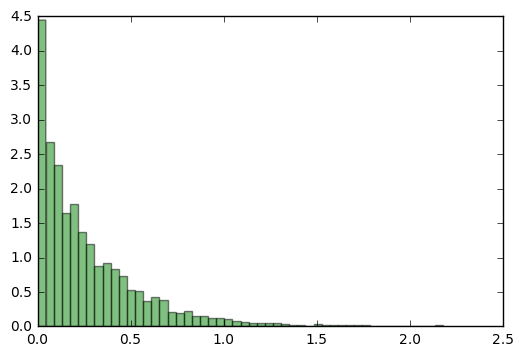

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

num_bins = 50
# the histogram of the data
n, bins, patches = plt.hist(out[0]*NP.delta_t, num_bins, normed=1, facecolor='green', alpha=0.5)
plt.show()

## Variando el numero de ten.Aceptores

In [10]:
num = [10, 50, 100]
num_intrisic = [0, 1, 5, 10]

for j in num_intrisic:
    for i in num:
        # Dopantes propios (intrisicos) de la NP
        dopantes_propios = ten.Aceptor(number=i, r_mechanisms=1, way='vol')
        # Dopantes que le vamos a agregar a la NP
        dopantes = ten.Aceptor(number=j, r_mechanisms=3.14, way='vol')
        # Nanoparticula
        NP = ten.Nanoparticle(r_param=[15, 0], tau_d=0.333, mean_path=80, epsilon=1, 
                              intrinsic_aceptors=dopantes_propios)
        
        # Experiment
        out = experiments.quenching(NP, dopantes, forster, 'laser')
        print()
        print("Eficiencia: {0}, Nº decaidos: {1}, Nº transferidos: {2}".format(out[0], out[1], out[3]-out[1]))
        print("Pasos promedio: {0:.2f} nm, Tiempo total: {1:.2f} seg.".format(out[2], out[4]))


Eficiencia: 0.0245, Nº decaidos: 1951, Nº transferidos: 49
Pasos promedio: 76.50 nm, Tiempo total: 2.45 seg.

Eficiencia: 0.1185, Nº decaidos: 1763, Nº transferidos: 237
Pasos promedio: 71.39 nm, Tiempo total: 2.56 seg.

Eficiencia: 0.191, Nº decaidos: 1618, Nº transferidos: 382
Pasos promedio: 63.82 nm, Tiempo total: 2.41 seg.

Eficiencia: 0.0395, Nº decaidos: 1921, Nº transferidos: 79
Pasos promedio: 77.52 nm, Tiempo total: 2.17 seg.

Eficiencia: 0.116, Nº decaidos: 1768, Nº transferidos: 232
Pasos promedio: 70.93 nm, Tiempo total: 2.23 seg.

Eficiencia: 0.2096, Nº decaidos: 1976, Nº transferidos: 524
Pasos promedio: 63.30 nm, Tiempo total: 2.53 seg.

Eficiencia: 0.1328, Nº decaidos: 2168, Nº transferidos: 332
Pasos promedio: 68.30 nm, Tiempo total: 2.32 seg.

Eficiencia: 0.208, Nº decaidos: 1584, Nº transferidos: 416
Pasos promedio: 63.16 nm, Tiempo total: 1.94 seg.

Eficiencia: 0.2604, Nº decaidos: 1849, Nº transferidos: 651
Pasos promedio: 60.58 nm, Tiempo total: 2.46 seg.

Efici